<a href="https://colab.research.google.com/github/mystlee/2024_CSU_AI/blob/main/chapter5/huggingface_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pretrained model 활용    
## transformers?
transformers는 transformer구조로 학습된 모델들을 공유하는 하나의 플랫폼   
!ref[https://huggingface.co/]

In [18]:
!pip install transformers torch torchvision datasets pillow sentencepiece datasets nltk -qq

In [9]:
import torch
import requests
import numpy as np
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
from google.colab import files

model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

Saving cat1.jpg to cat1 (2).jpg


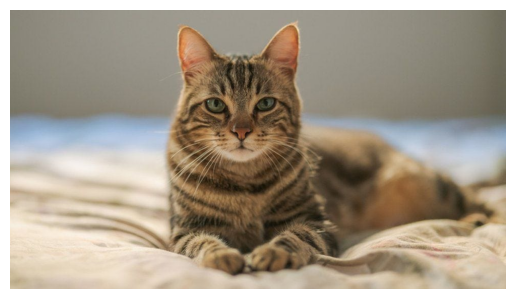

Predicted class: tabby, tabby cat
Probability: 0.7418860793113708


In [4]:
uploaded = files.upload()
for filename in uploaded.keys():
    try:
        image = Image.open(filename)
        if image.mode != 'RGB':
            image = image.convert('RGB')

        image_array = np.array(image)

        if len(image_array.shape) != 3 or image_array.shape[2] != 3:
            raise ValueError("Not supported image (exptected channel: 3)")

        plt.imshow(image)
        plt.axis('off')
        plt.show()

        inputs = feature_extractor(images = image, return_tensors = "pt")
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        predicted_class_idx = probabilities.argmax(-1).item()
        print("Predicted class:", model.config.id2label[predicted_class_idx])
        print("Probability:", probabilities[0, predicted_class_idx].item())
    except Exception as e:
        print(f"Unknown error with {filename}:", e)

In [11]:
from transformers import DetrImageProcessor, DetrForObjectDetection
model_name = "facebook/detr-resnet-50"
model = DetrForObjectDetection.from_pretrained(model_name)
processor = DetrImageProcessor.from_pretrained(model_name)
model.eval()

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

Saving cat1.jpg to cat1 (5).jpg


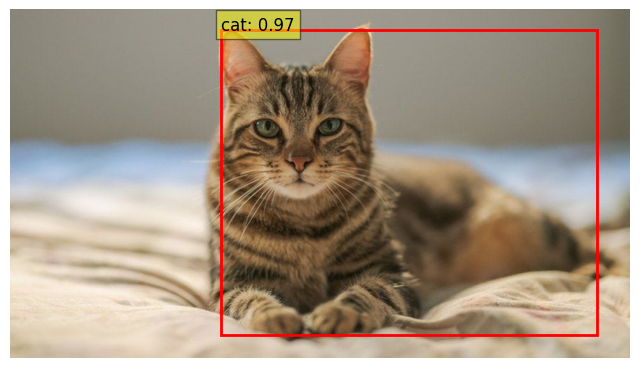

In [14]:
uploaded = files.upload()
for filename in uploaded.keys():
    try:
        image = Image.open(filename)
        if image.mode != 'RGB':
            image = image.convert('RGB')

        image_array = np.array(image)

        if len(image_array.shape) != 3 or image_array.shape[2] != 3:
            raise ValueError("Not supported image (exptected channel: 3)")

        inputs = feature_extractor(images = image, return_tensors = "pt")
        with torch.no_grad():
            outputs = model(**inputs)
        target_sizes = torch.tensor([image.size[::-1]])
        results = processor.post_process_object_detection(outputs,
                                                          threshold = 0.9,
                                                          target_sizes=target_sizes)[0]

        fig, ax = plt.subplots(1, figsize = (8, 5))
        ax.imshow(image)

        for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
            box = [round(i, 2) for i in box.tolist()]
            x, y, w, h = box
            rect = patches.Rectangle((x, y), w - x, h - y, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            ax.text(x, y, f"{model.config.id2label[label.item()]}: {score:.2f}",
                    fontsize = 12, bbox = dict(facecolor = 'yellow', alpha = 0.5))
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Unknown error with {filename}:", e)

In [15]:
from transformers import BlipProcessor, BlipForConditionalGeneration
model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)
model.eval()

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

Saving cat1.jpg to cat1 (7).jpg


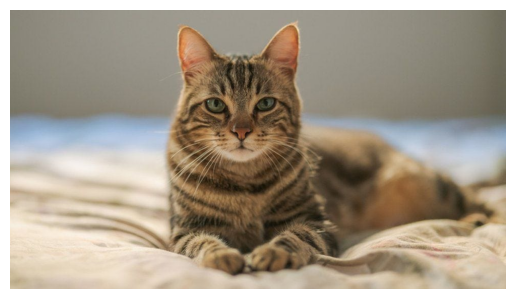

Generated Caption: a cat laying on top of a bed


In [17]:
uploaded = files.upload()
for filename in uploaded.keys():
    try:
        image = Image.open(filename)
        if image.mode != 'RGB':
            image = image.convert('RGB')

        image_array = np.array(image)

        if len(image_array.shape) != 3 or image_array.shape[2] != 3:
            raise ValueError("Not supported image (exptected channel: 3)")

        plt.imshow(image)
        plt.axis('off')
        plt.show()

        inputs = processor(images=image, return_tensors = "pt")
        with torch.no_grad():
            outputs = model.generate(**inputs, max_length = 50, num_beams = 5)
        caption = processor.decode(outputs[0], skip_special_tokens=True)
        print("Generated Caption:", caption)
    except Exception as e:
        print(f"Unknown error with {filename}:", e)

## 언어 처리 모델들

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline
import nltk
nltk.download('punkt')
from PIL import Image
import requests
import io
import matplotlib.pyplot as plt

In [6]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
model_name = "facebook/mbart-large-50-many-to-many-mmt"
tokenizer = MBart50TokenizerFast.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)

In [8]:
src_text = "아니, 한 밤중에 이게 무슨 일이야?"
# tokenizing
tokenizer.src_lang = "ko_KR"
encoded = tokenizer(src_text, return_tensors = "pt")

# model infernece
generated_tokens = model.generate(**encoded,
                                  forced_bos_token_id = tokenizer.lang_code_to_id["en_XX"])

# decoding
translated_text = tokenizer.batch_decode(generated_tokens, skip_special_tokens = True)[0]
print("번역 결과:", translated_text)

번역 결과: No, what's going on overnight?


In [19]:
from transformers import BartForConditionalGeneration, BartTokenizer

model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model.eval()

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
    

In [22]:
text = """
Artificial intelligence (AI) has been rapidly advancing over the past few years. From natural language processing to computer vision, AI technologies are transforming various industries and aspects of daily life. Researchers and developers continue to push the boundaries, creating more sophisticated and capable models.
"""

inputs = tokenizer.encode("summarize: " + text,
                          return_tensors = "pt",
                          max_length = 1024,
                          truncation = True)
summary_ids = model.generate(inputs, max_length = 128,
                             min_length = 10)
summarized_text = tokenizer.decode(summary_ids[0], skip_special_tokens = True)
print("입력 text: ", text)
print("요약 결과:", summarized_text)

요약 결과: Artificial intelligence has been rapidly advancing over the past few years. Researchers and developers continue to push the boundaries, creating more sophisticated and capable models.


### 난 이 모델이 마음에 안들어!
google의 T5 모델을 써볼래

In [23]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
model_name = "t5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.eval()

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (d

In [26]:
inputs = tokenizer.encode("summarize: " + text,
                          return_tensors = "pt",
                          max_length = 1024,
                          truncation = True)
summary_ids = model.generate(inputs, max_length = 128,
                             min_length = 10)
summarized_text = tokenizer.decode(summary_ids[0], skip_special_tokens = True)
print("입력 text: ", text)
print("요약 결과:", summarized_text)

입력 text:  
Artificial intelligence (AI) has been rapidly advancing over the past few years. From natural language processing to computer vision, AI technologies are transforming various industries and aspects of daily life. Researchers and developers continue to push the boundaries, creating more sophisticated and capable models.

요약 결과: artificial intelligence (AI) has been rapidly advancing over the past few years . researchers and developers continue to push the boundaries . new models are being created to be more sophisticated and capable .


In [29]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

model_name = "distilbert-base-cased-distilled-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
model.eval()

context = """
Artificial intelligence (AI) has been rapidly advancing over the past few years. From natural language processing to computer vision, AI technologies are transforming various industries and aspects of daily life. Researchers and developers continue to push the boundaries, creating more sophisticated and capable models.
"""

question = "What aspects of daily life are being transformed by AI technologies?"

In [33]:
inputs = tokenizer.encode_plus(question, context,
                              add_special_tokens = True, return_tensors = "pt")
input_ids = inputs["input_ids"].tolist()[0]

with torch.no_grad():
    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

answer_start = torch.argmax(answer_start_scores)
answer_end = torch.argmax(answer_end_scores) + 1
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

print(f"context: {context}")
print(f"question: {question}")
print(f"answer: {answer}")

context: 
Artificial intelligence (AI) has been rapidly advancing over the past few years. From natural language processing to computer vision, AI technologies are transforming various industries and aspects of daily life. Researchers and developers continue to push the boundaries, creating more sophisticated and capable models.

question: What aspects of daily life are being transformed by AI technologies?
answer: various industries


In [31]:
from transformers import pipeline
qa_pipeline = pipeline("question-answering",
                       model = "distilbert-base-cased-distilled-squad",
                       tokenizer = "distilbert-base-cased-distilled-squad")


result = qa_pipeline(question = question, context = context)
print(f"context: {context}")
print(f"question: {question}")
print(f"answer: {result['answer']}")
print(f"prob.: {result['score']:.4f}")


context: 
Artificial intelligence (AI) has been rapidly advancing over the past few years. From natural language processing to computer vision, AI technologies are transforming various industries and aspects of daily life. Researchers and developers continue to push the boundaries, creating more sophisticated and capable models.

question: What aspects of daily life are being transformed by AI technologies?
answer: various industries
prob.: 0.6262
